In [16]:
import numpy as np
import ROOT

# file_eff_EleID = ROOT.TFile.Open( "efficiencies/electron/2017_ElectronTight.root", "READ" )
# file_eff_EleID = ROOT.TFile.Open( "efficiencies/electron/2017/2017_ElectronTight.root", "READ" )
file_eff_EleTrigger = ROOT.TFile.Open( "egammaEffi.txt_EGM2D-Trigger.root", "READ" )

In [17]:
file_eff_EleTrigger.ls()

TFile**		egammaEffi.txt_EGM2D-Trigger.root	
 TFile*		egammaEffi.txt_EGM2D-Trigger.root	
  KEY: TH2F	EGamma_SF2D;1	e/#gamma scale factors
  KEY: TH2F	EGamma_EffData2D;1	e/#gamma scale factors
  KEY: TH2F	EGamma_EffMC2D;1	e/#gamma scale factors
  KEY: TGraphErrors	grSF1D_0;1	Graph
  KEY: TGraphErrors	grSF1D_1;1	Graph
  KEY: TGraphErrors	grSF1D_2;1	Graph
  KEY: TGraphErrors	grSF1D_3;1	Graph
  KEY: TGraphErrors	grSF1D_4;1	Graph
  KEY: TGraphErrors	grSF1D_5;1	Graph
  KEY: TH2F	statData;1	e/#gamma absolute SF syst: statData 
  KEY: TH2F	statMC;1	e/#gamma absolute SF syst: statMC 
  KEY: TH2F	altBkgModel;1	e/#gamma absolute SF syst: altBkgModel 
  KEY: TH2F	altSignalModel;1	e/#gamma absolute SF syst: altSignalModel 
  KEY: TH2F	altMCEff;1	e/#gamma absolute SF syst: altMCEff 
  KEY: TH2F	altTagSelection;1	e/#gamma absolute SF syst: altTagSelection 


In [18]:
h_eff_sf_EleTrigger_2D = file_eff_EleTrigger.Get( "EGamma_SF2D" )

-2.25 -2.5 -2.0
2.25 2.0 2.5
15.0 10.0 20.0
350.0 200.0 500.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


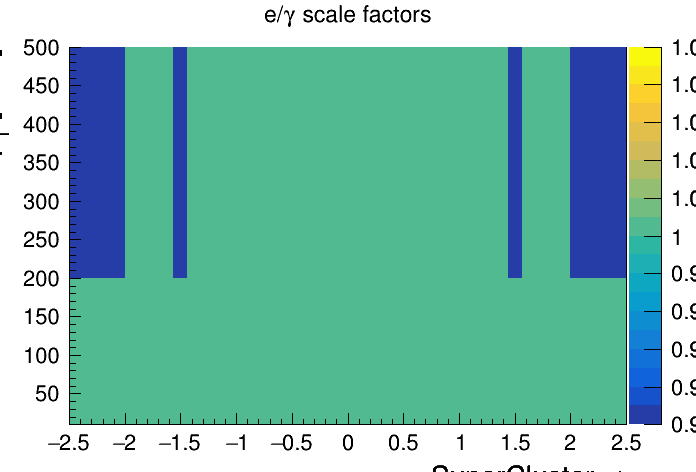

In [19]:
print ( h_eff_sf_EleTrigger_2D.GetXaxis().GetBinCenter( 1 ),
        h_eff_sf_EleTrigger_2D.GetXaxis().GetBinLowEdge( 1 ),
        h_eff_sf_EleTrigger_2D.GetXaxis().GetBinUpEdge( 1 ) )
print ( h_eff_sf_EleTrigger_2D.GetXaxis().GetBinCenter( h_eff_sf_EleTrigger_2D.GetNbinsX() ),
        h_eff_sf_EleTrigger_2D.GetXaxis().GetBinLowEdge( h_eff_sf_EleTrigger_2D.GetNbinsX() ),
        h_eff_sf_EleTrigger_2D.GetXaxis().GetBinUpEdge( h_eff_sf_EleTrigger_2D.GetNbinsX() ) )
print ( h_eff_sf_EleTrigger_2D.GetYaxis().GetBinCenter( 1 ),
        h_eff_sf_EleTrigger_2D.GetYaxis().GetBinLowEdge( 1 ),
        h_eff_sf_EleTrigger_2D.GetYaxis().GetBinUpEdge( 1 ) )
print ( h_eff_sf_EleTrigger_2D.GetYaxis().GetBinCenter( h_eff_sf_EleTrigger_2D.GetNbinsY() ),
        h_eff_sf_EleTrigger_2D.GetYaxis().GetBinLowEdge( h_eff_sf_EleTrigger_2D.GetNbinsY() ),
        h_eff_sf_EleTrigger_2D.GetYaxis().GetBinUpEdge( h_eff_sf_EleTrigger_2D.GetNbinsY() ) )
canvas1 = ROOT.TCanvas( "canvas1" )
h_eff_sf_EleTrigger_2D.Draw( "COLZ" )
canvas1.Draw()

In [20]:
# class ElectronScaleFactor:
#     def __init__( self, histos ):
#         self.h2D_EleID = histos[ "EleID" ]
#     def __call__( self, pt, eta ):
#         sf_ = 1.
#         unc_ = 0.
#         if pt < 500.:
#             bin2D_ = self.h2D_EleID.FindBin( eta, pt )
#             sf_ = self.h2D_EleID.GetBinContent( bin2D_ )
#             unc_ = self.h2D_EleID.GetBinError( bin2D_ )
#         else:
#             bin2D_ = self.h2D_EleID.FindBin( eta, self.h2D_EleID.GetYaxis().GetBinCenter( self.h2D_EleID.GetNbinsY() ) )
#             sf_ = self.h2D_EleID.GetBinContent( bin2D_ )
#             unc_ = self.h2D_EleID.GetBinError( bin2D_ )
#         return ( sf_, unc_ )

In [21]:
class ElectronScaleFactor:
    def __init__( self, histos ):
        self.h2D_EleTrigger = histos[ "EleTrigger" ]
    def __call__( self, pt, eta ):
        sf_ = 1.
        unc_ = 0.
        bin2D_ = None
        if pt < 500.:
            bin2D_ = self.h2D_EleTrigger.FindBin( pt, eta )
        else:
            bin2D_ = self.h2D_EleTrigger.FindBin( self.h2D_EleTrigger.GetXaxis().GetBinCenter( self.h2D_EleTrigger.GetNbinsX() ), eta  )
        sf_ = self.h2D_EleTrigger.GetBinContent( bin2D_ )
        unc_ = self.h2D_EleTrigger.GetBinError( bin2D_ )
        return ( sf_, unc_ )

In [22]:
electron_scale_factor_ = ElectronScaleFactor( histos = { "EleTrigger": h_eff_sf_EleTrigger_2D} )

In [23]:
electron_scale_factor_( 0.5, 100. )

(1.0, 0.001414213562373095)